## Members 
- Benedictus Kent RACHMAT
- Dana AUBAKIROVA
- Diego Andres TORRES GUARIN

## Exploratory data analysis

Import the necessary libraries

In [288]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from torchvision import datasets, transforms

Import the image using `datasets.ImageFolder` (Assuming that we have the data with image format)

In [289]:
train_folder = datasets.ImageFolder('../data/new_data/train', transform=None)
train_data   = list(train_folder)

val_folder = datasets.ImageFolder('../data/new_data/valid-lab', transform=None)
val_data   = list(val_folder)

print("Number of datapoints for training data:",len(train_data))
print("Number of datapoints for validation data:",len(val_data))

Number of datapoints for training data: 4160
Number of datapoints for validation data: 1040


Using the `train_folder` variable, we can extract the class names

In [290]:
idx_to_class = {v:k for k, v in train_folder.class_to_idx.items()}
classes      = [idx_to_class[x] for x in train_folder.targets]

df_label = pd.DataFrame(list(train_folder.class_to_idx.items()),columns = ['labels', 'code']).to_string(index=False)
print(df_label)

   labels  code
    beach     0
chaparral     1
    cloud     2
   desert     3
   forest     4
   island     5
     lake     6
   meadow     7
 mountain     8
    river     9
      sea    10
 snowberg    11
  wetland    12


Using `pandas` we could plot how many pictures we have for each label, we can conclude that chaparral has the most data among all.

In [323]:
class_counts = pd.Series(classes).value_counts()
class_counts_val = pd.Series([idx_to_class[x] for x in val_folder.targets]).value_counts()
concat_classes = pd.concat([class_counts, class_counts_val], axis=1, keys=["train","validation"])
concat_classes

train  validation
chaparral    330          70
desert       327          73
wetland      324          76
lake         322          78
snowberg     322          78
meadow       320          80
river        320          80
forest       319          81
island       319          81
sea          319          81
cloud        315          85
mountain     315          85
beach        308          92

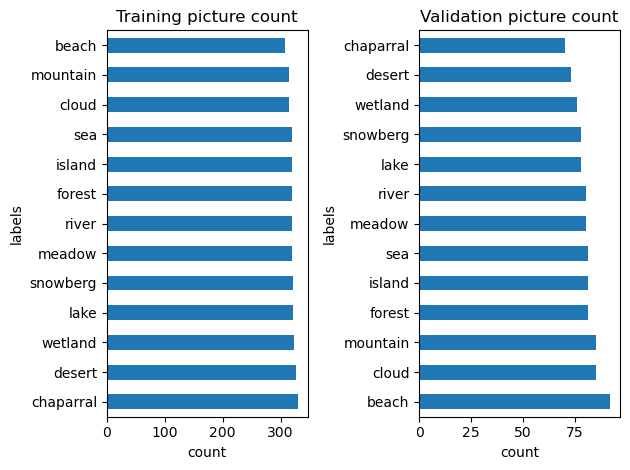

In [338]:
plt.subplot(1, 2, 1)
ax1 = class_counts.plot.barh()
ax1.plot()
ax1.set(xlabel="count", ylabel="labels", title="Training picture count")
plt.subplot(1, 2, 2)
ax2 = class_counts_val.plot.barh() 
ax2.set(xlabel="count", ylabel="labels", title="Validation picture count")
plt.tight_layout()
plt.show()

We could also calculate the probability distribution of each label 

In [339]:
training_prob = class_counts/class_counts.sum()
validation_prob = class_counts_val/class_counts_val.sum()
concat_prob = pd.concat([training_prob, validation_prob], axis=1, keys=["train","validation"])
concat_prob

train  validation
chaparral  0.079327    0.067308
desert     0.078606    0.070192
wetland    0.077885    0.073077
lake       0.077404    0.075000
snowberg   0.077404    0.075000
meadow     0.076923    0.076923
river      0.076923    0.076923
forest     0.076683    0.077885
island     0.076683    0.077885
sea        0.076683    0.077885
cloud      0.075721    0.081731
mountain   0.075721    0.081731
beach      0.074038    0.088462

In [294]:
def give_figure(label):
    ROWS, COLS = 4,4
    indices = np.random.choice(np.where(np.array(classes)==label)[0], ROWS*COLS)
    fig, axes = plt.subplots(ROWS, COLS, figsize=(20,20))
    for ax, idx in zip(axes.flatten(), indices):
        img = train_data[idx][0]
        ax.imshow(np.array(img))
        
    return fig

To see the images, we could change the parameter `label` to whatever label we want to see some of the images

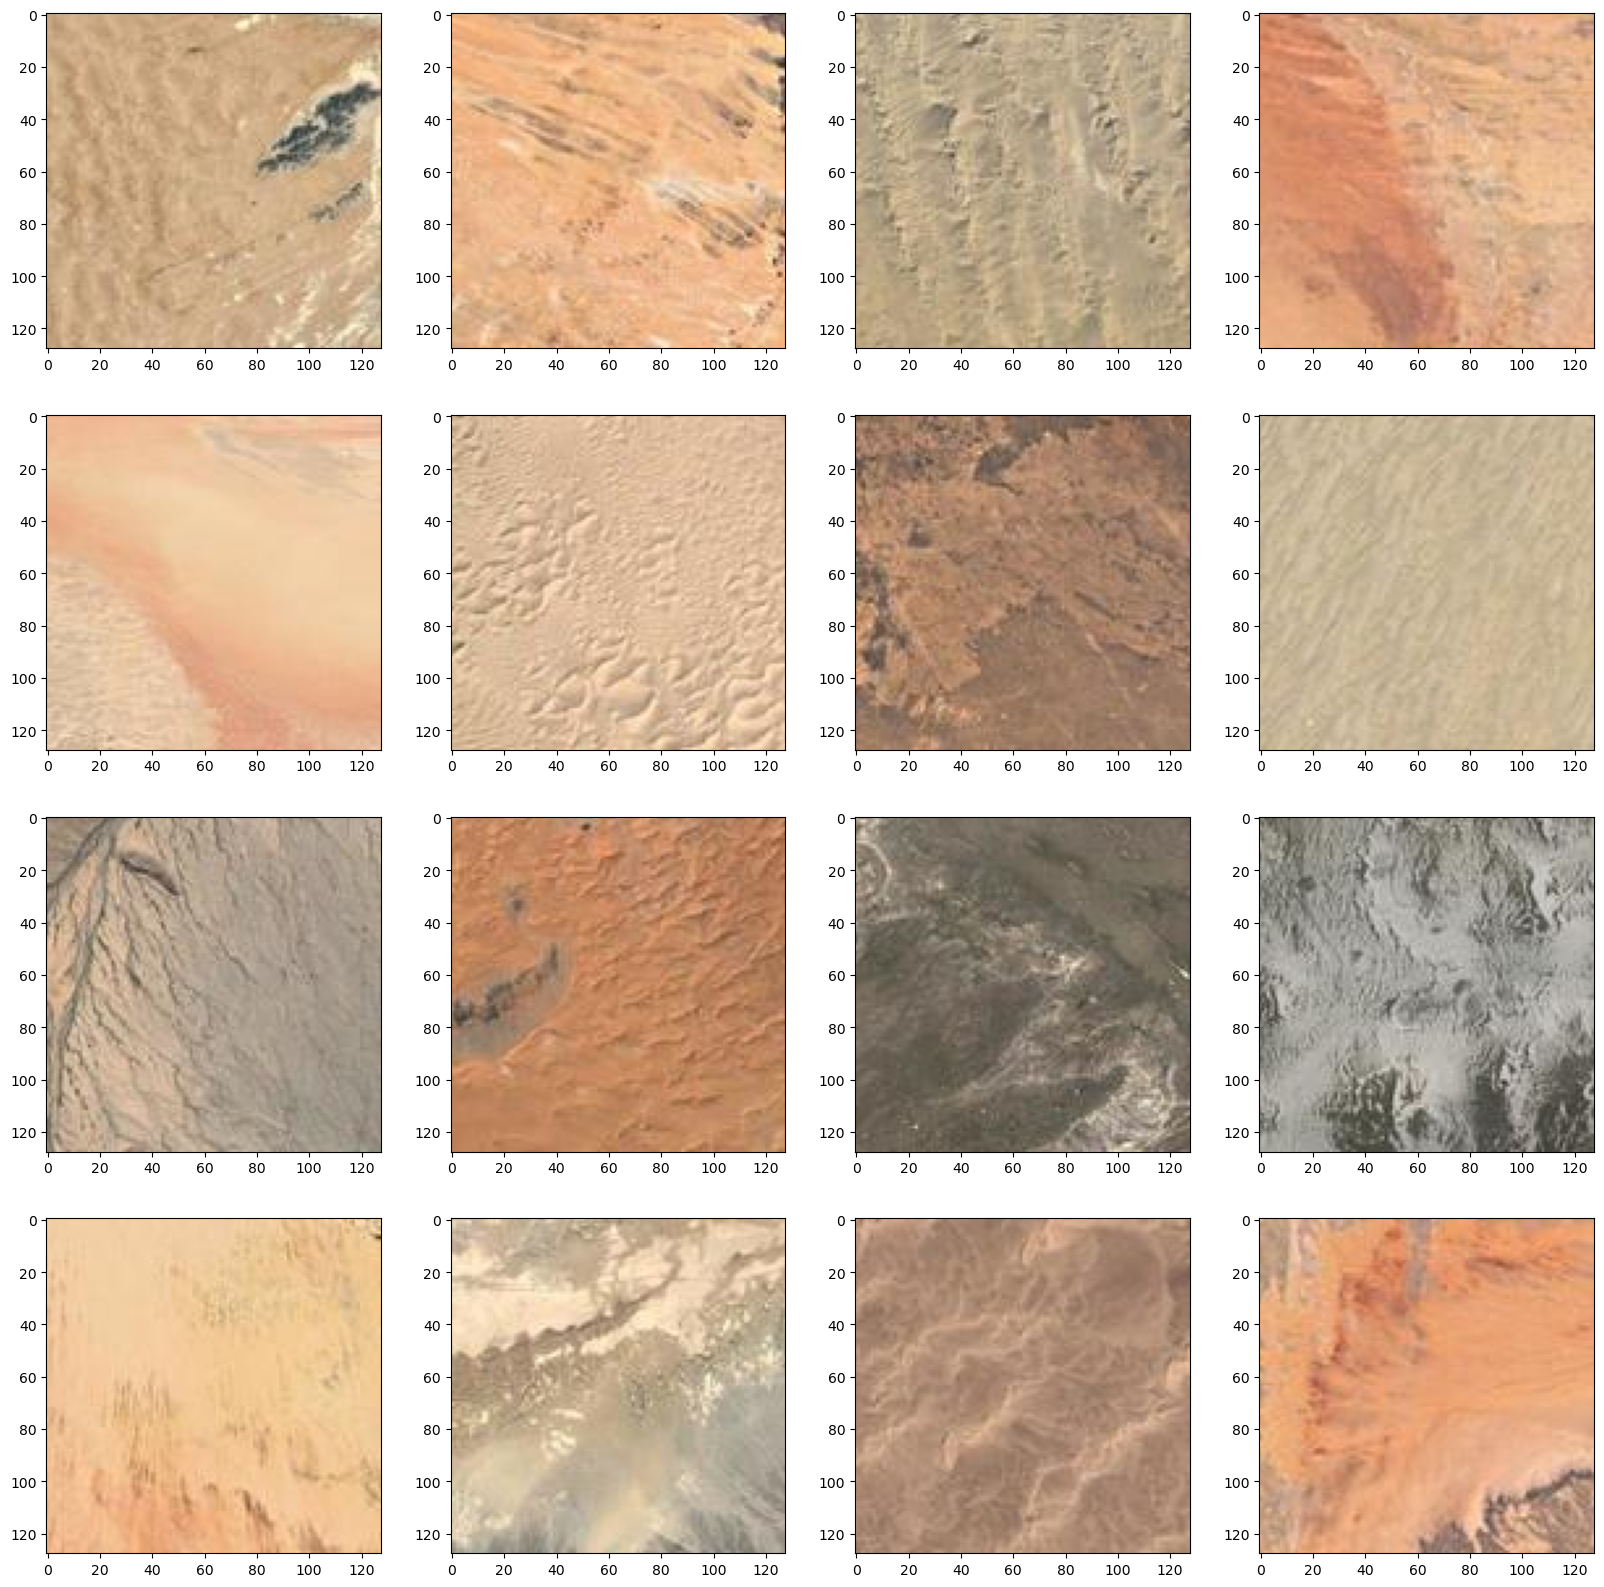

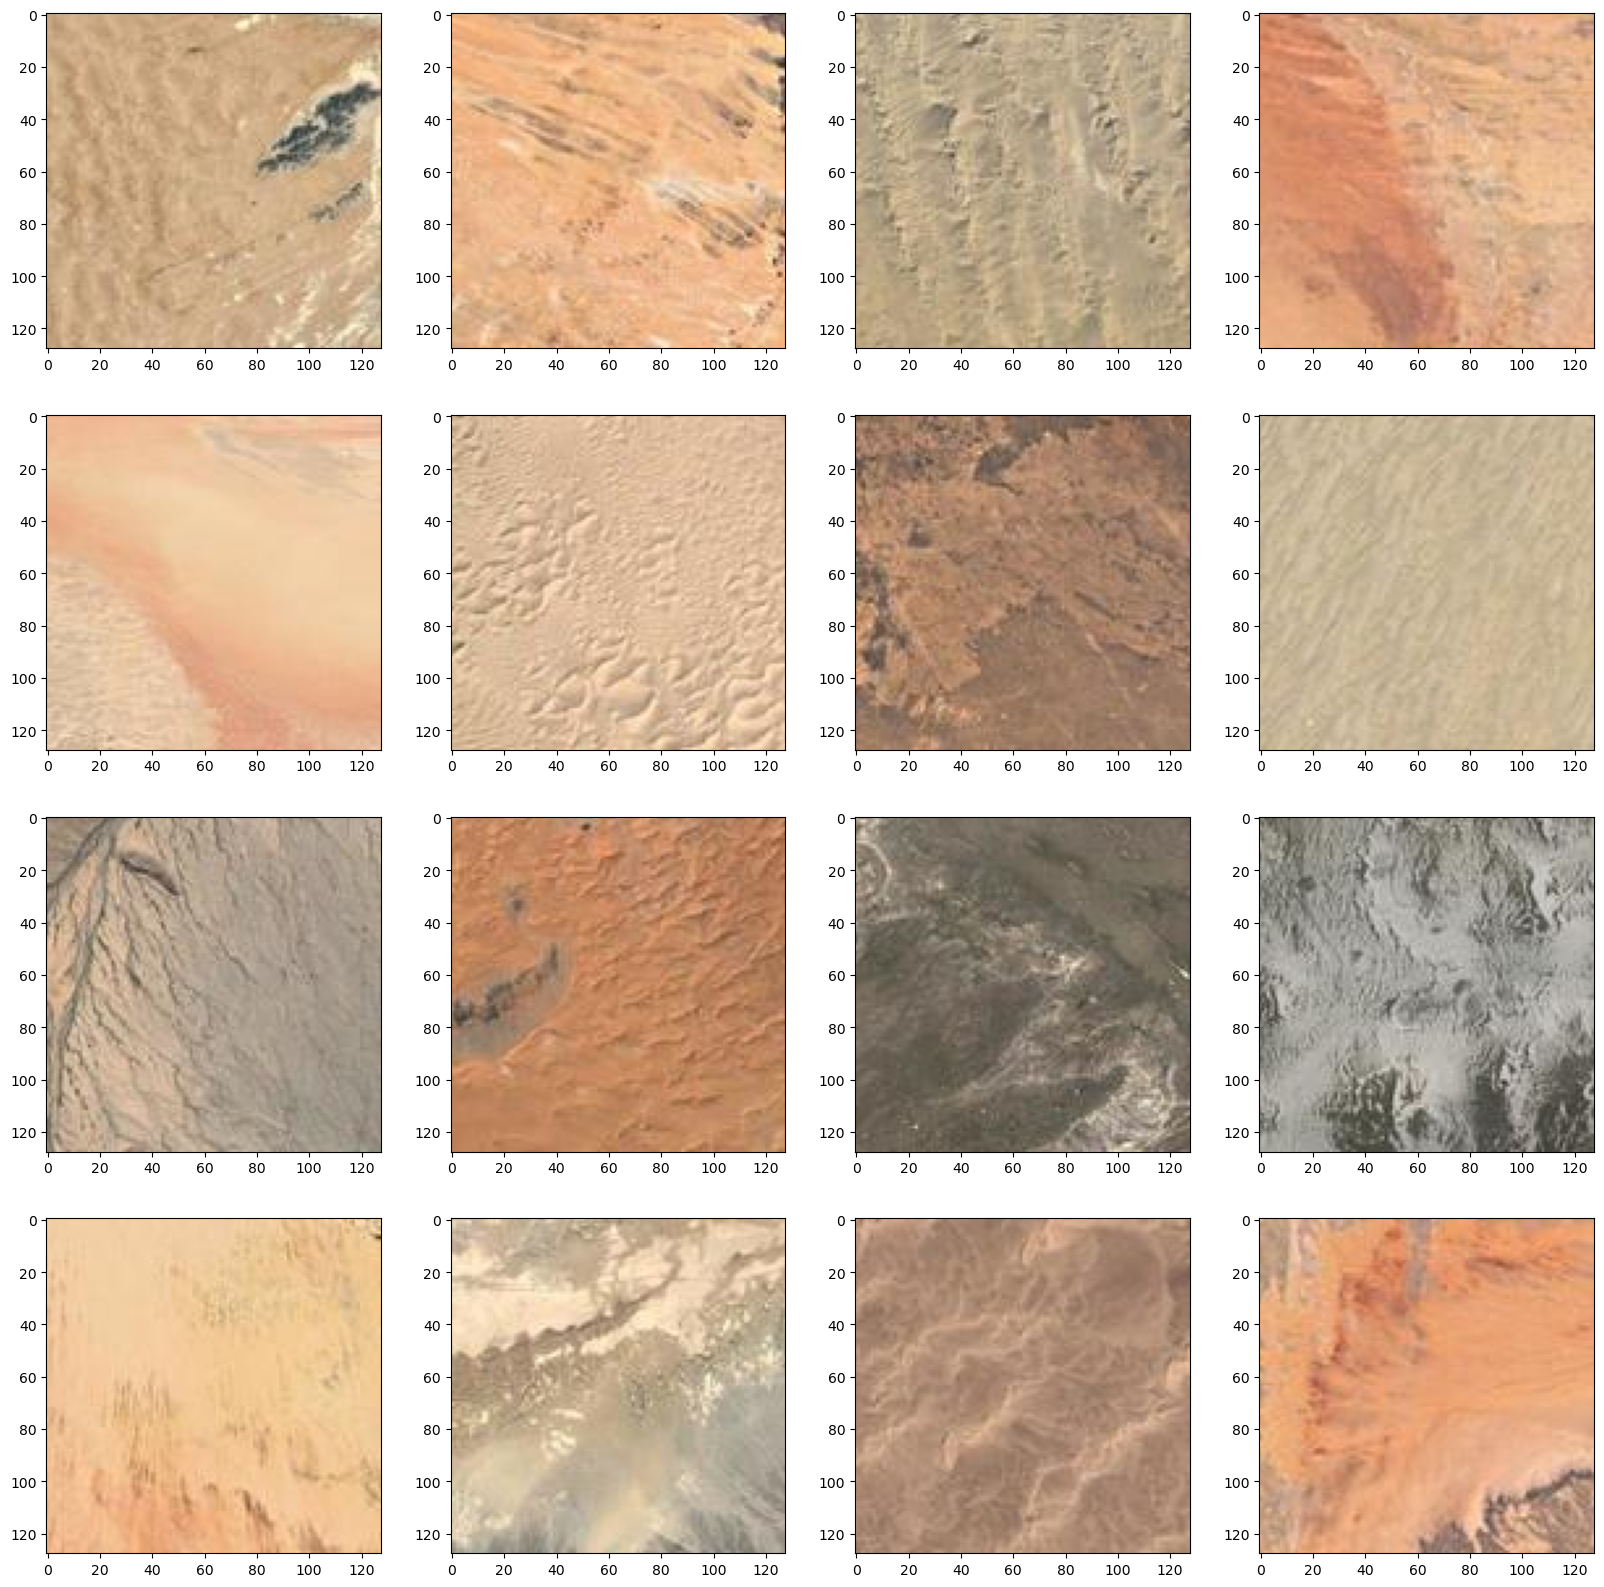

In [295]:
give_figure('desert')

For further exploratory data analysis, we could analyze the RGB color model and plot the graph 

In [340]:
data_coords = pd.DataFrame(np.zeros((len(train_data), 4)), columns=list('RGB')+['label'])
for n, (img, label) in enumerate(train_data):
    data_coords.iloc[n, :3] = np.array(img).mean(axis=(0,1))
    data_coords.iloc[n, 3] = idx_to_class[label]
    
data_coords

R           G           B    label
0     121.233643  144.952515  122.415894    beach
1     132.344788  139.552551  129.149719    beach
2     141.629639  150.961548  138.173950    beach
3      91.528687   98.197632   95.409363    beach
4     122.109253  139.947998  139.831299    beach
...          ...         ...         ...      ...
4155   63.124084   86.420410   58.049927  wetland
4156   64.196411   68.888367   55.825623  wetland
4157   48.039917   57.498718   50.928833  wetland
4158   41.097473   45.401489   31.682678  wetland
4159   46.879089   49.307251   42.876648  wetland

[4160 rows x 4 columns]

In [298]:
data_coords[list('RGB')] = data_coords[list('RGB')]/255

In [299]:
pca = PCA(2)
transformed_coords = pca.fit_transform(data_coords[list('RGB')])
data_coords[list('xy')] = transformed_coords

In [300]:
red, green, blue = pca.transform(np.identity(3))

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


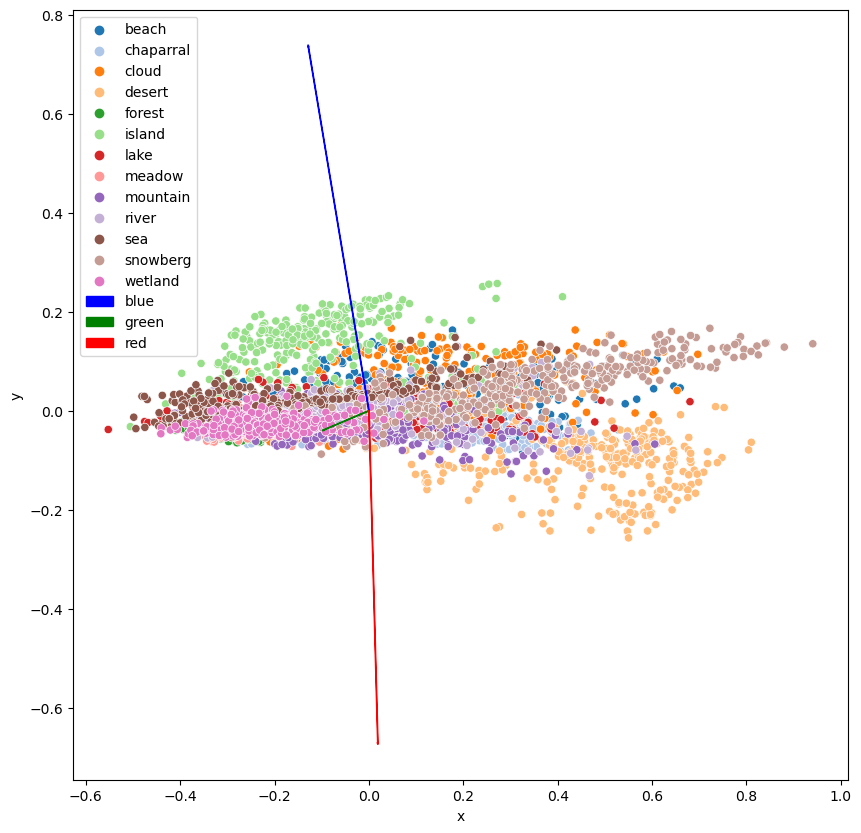

In [301]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='x', y='y', hue='label', data=data_coords, palette='tab20')
plt.arrow(0,0,*blue, color='blue', label='blue')
plt.arrow(0,0,*green, color='green', label='green')
plt.arrow(0,0,*red, color='red', label='red')
plt.legend()
plt.show()

In [302]:
train_data

[(<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128>, 0),
 (<PIL.Image.Image image mode=RGB size=128x128